# Лабораторная работа №4

Проведение кластеризации над множеством

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

**Задание**: кластеризация набора данных о покупках клиентов в супермаркете. 

Вы владеете торговым центром в супермаркете, и через членские карты у вас есть некоторые основные данные о ваших клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и оценка расходов. Вам необходимо понимание того, кого можно легко объединить, чтобы можно было передать указания маркетинговой команде и соответствующим образом спланировать стратегию проведения акций. 

Необходимо провести исследование набора данных на то, по каким данным Вы будете проводить визуализацию и на оптимальное количество кластеров. 

In [2]:
%%capture
!wget https://www.dropbox.com/s/3uoupxpfvhtr7wg/Mall_Customers.csv

In [3]:
df = pd.read_csv('Mall_Customers.csv') #Загружаем данные

df_one_hot = pd.get_dummies(df).astype(int) #Проводим one_hot кодирование столбца с полом
df_one_hot = df_one_hot.drop(columns=['Gender_Male', 'CustomerID']) #Удаляем один из двух столбцов Gender_Male и Gender_Female, 
#потому что второй столбец не несет дополнительной информации
#также удаляем CustomerID, чтобы модель не находила зависимости между id пользователя и другими фичами


df_one_hot_copy = df_one_hot #Создаю копию
df_one_hot_copy = df_one_hot_copy.drop(columns=['Gender_Female']) #Интуитивно убираю столбец с полом, 
#чтобы поставить чисто экномические показатели, а не гендерные

df_one_hot_copy = df_one_hot_copy.values #Забираю значения в виде списка, чтобы было удобнее визуализировать

In [4]:
df_one_hot

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [5]:
# Используем модель KMeans на 5 классов
model = KMeans(n_clusters=5)
model.fit(df_one_hot)

all_predictions = model.predict(df_one_hot)
print(all_predictions)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


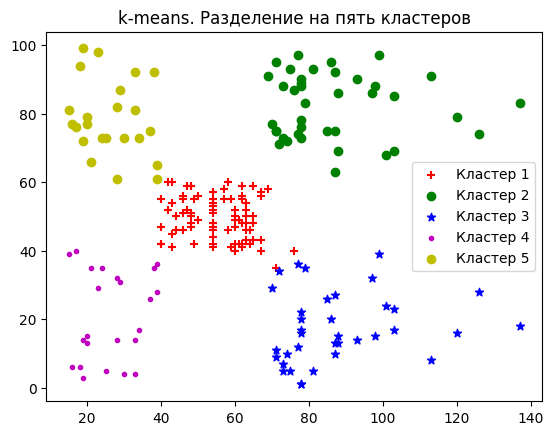

In [6]:
#Рисуем распредление классов
for i in range(0, len(df_one_hot_copy)):
    if all_predictions[i] == 0:
        c1 = plt.scatter(df_one_hot_copy[i, 1], df_one_hot_copy[i, 2], c='r', marker='+')
    elif all_predictions[i] == 1:
        c2 = plt.scatter(df_one_hot_copy[i, 1], df_one_hot_copy[i, 2], c='g', marker='o')
    elif all_predictions[i] == 2:
        c3 = plt.scatter(df_one_hot_copy[i, 1], df_one_hot_copy[i, 2], c='b', marker='*')
    elif all_predictions[i] == 3:
        c4 = plt.scatter(df_one_hot_copy[i, 1], df_one_hot_copy[i, 2], c='m', marker='.')
    elif all_predictions[i] == 4:
        c5 = plt.scatter(df_one_hot_copy[i, 1], df_one_hot_copy[i, 2], c='y', marker='o')

plt.legend([c1, c2, c3, c4, c5], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4', 'Кластер 5'])
plt.title('k-means. Разделение на пять кластеров')
plt.show()

**Получили идеальное распределение классов по Annual income(k$) и Spending score(1-100)**
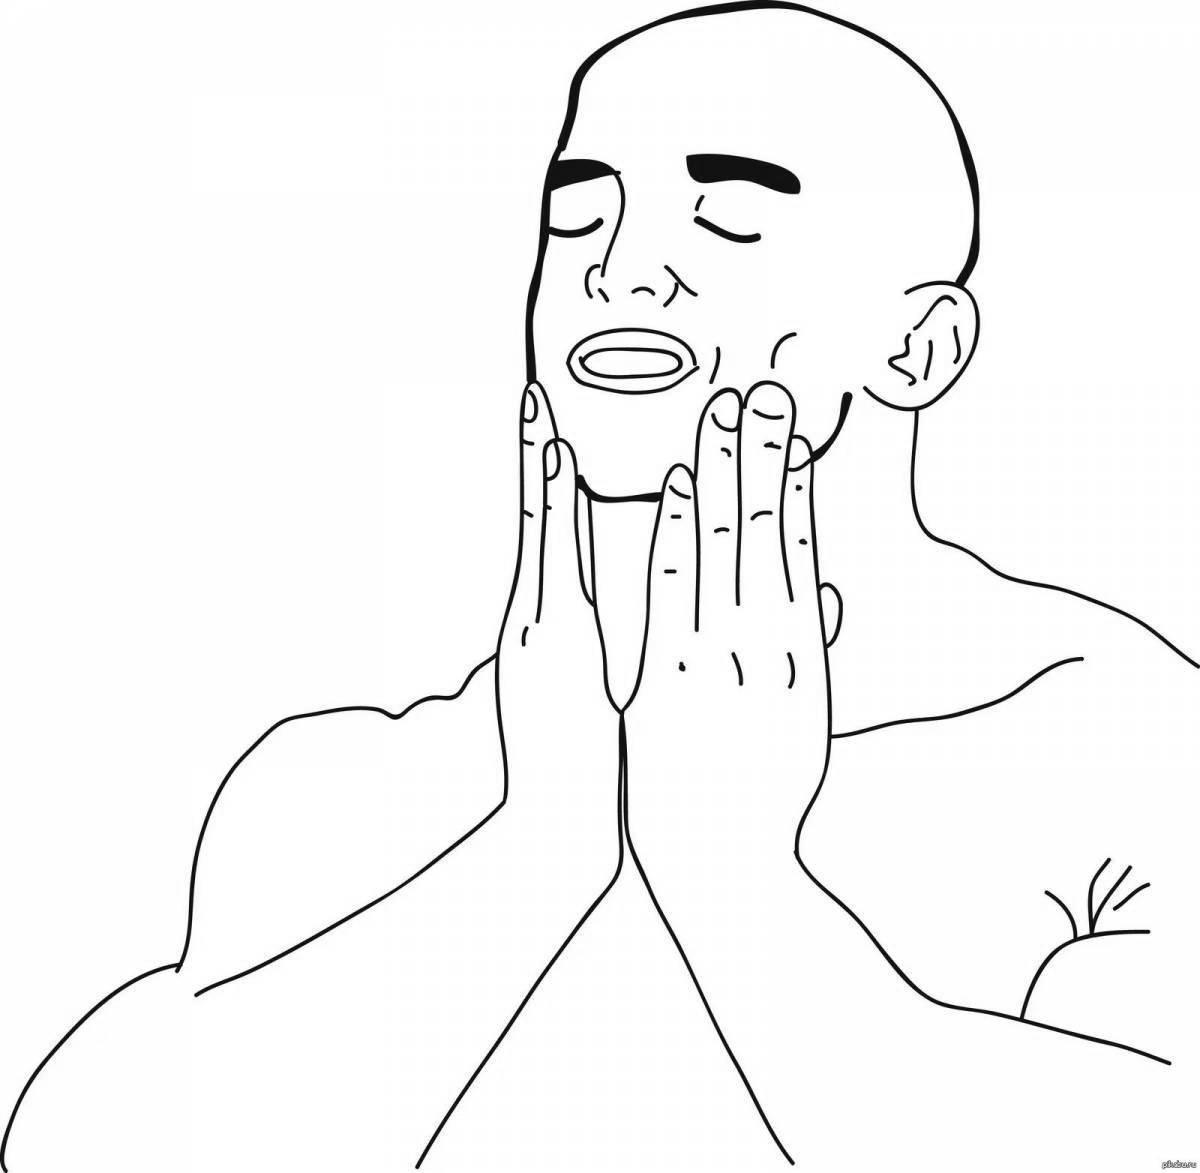
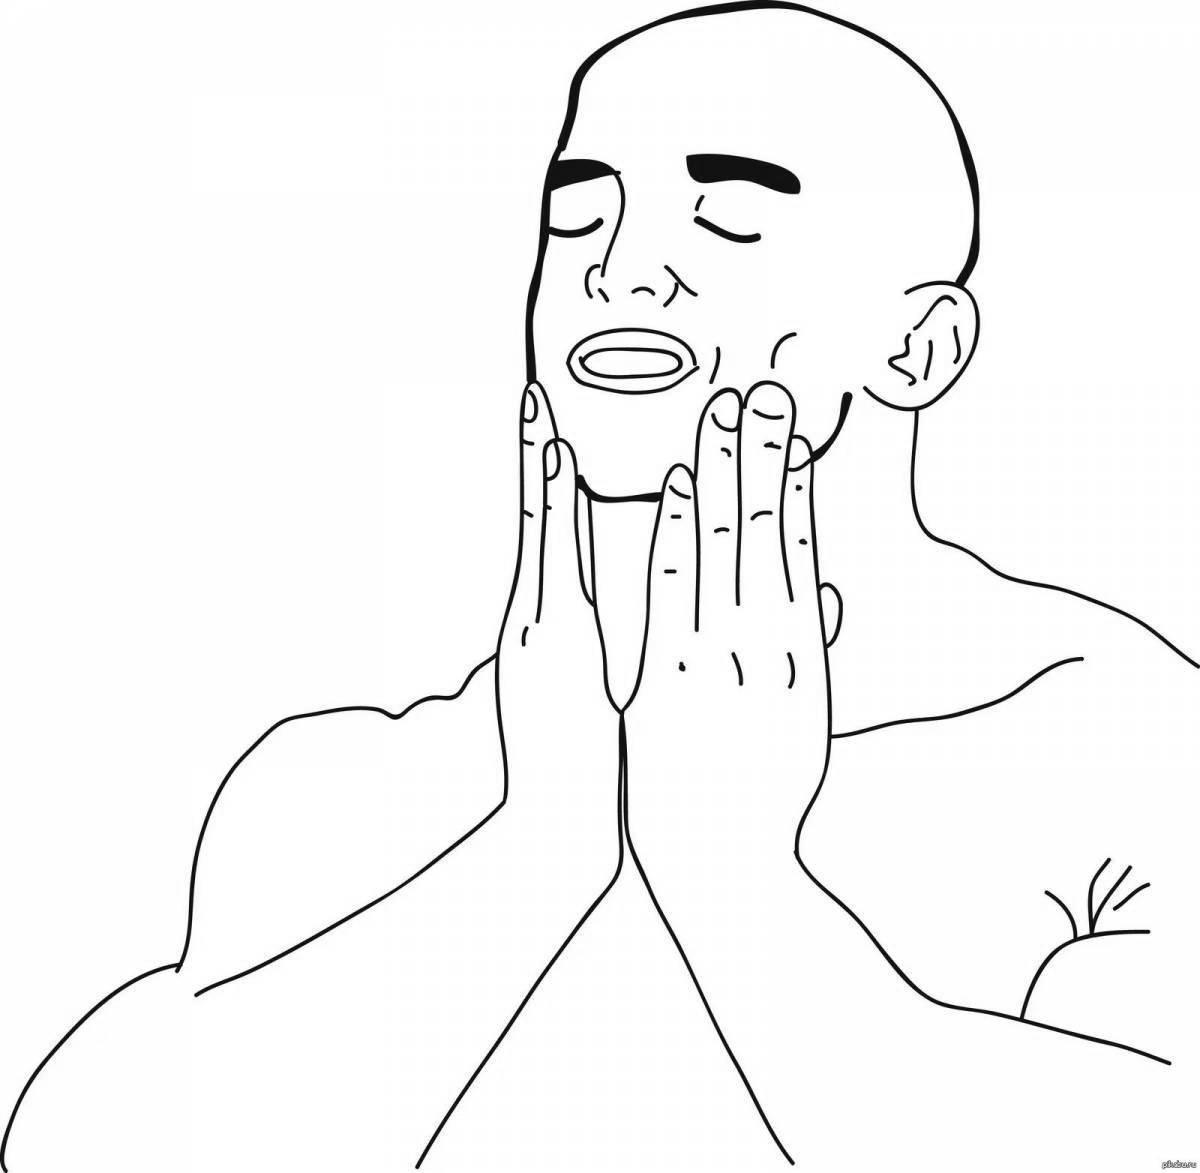